In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
img = cv2.imread('../data/sample_image/sample_rib2.jpg')
# img = cv2.imread('../data/bone_scan_crop/1_JAN/05012015/050120150005._3.jpg')
height, width = img.shape[:2]

## Image Enhancing

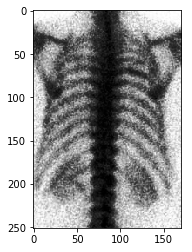

In [5]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
eq_img = cv2.equalizeHist(gray_img)
plt.imshow(eq_img,'gray')
plt.show()

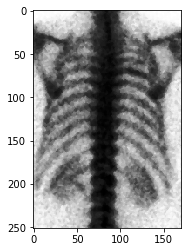

In [6]:
enhance_img = cv2.medianBlur(eq_img,3)
plt.imshow(enhance_img,cmap = 'gray')
plt.show()

## Edge Detection

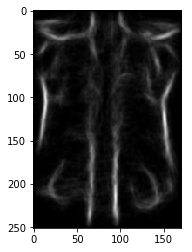

In [7]:
enhance_img2 = cv2.cvtColor(enhance_img,cv2.COLOR_GRAY2BGR)
enhance_img2 = np.float32(enhance_img2)
enhance_img2 = enhance_img2/255.0
structuredEdgeModel = cv2.ximgproc.createStructuredEdgeDetection("../Materials/structuredEdgeModel.yml")
enhance_img3 = structuredEdgeModel.detectEdges(enhance_img2)
plt.imshow(enhance_img3,cmap = 'gray')
plt.show()

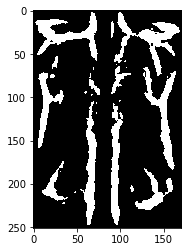

In [8]:
enhance_img3 = enhance_img3*255
enhance_img4 = enhance_img3>25
plt.imshow(enhance_img4,'gray')
plt.show()

In [9]:
enhance_img4

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [10]:
def convert_func(x):
    if(x==True):
        x = 255
    else:
        x = 0
    return(x)

conv_func = np.vectorize(convert_func)
enhance_img4 = conv_func(enhance_img4)
enhance_img4 = np.array(enhance_img4,dtype = np.uint8)

In [11]:
enhance_img4.dtype

dtype('uint8')

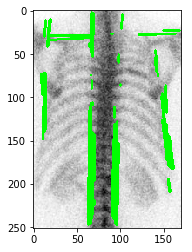

In [12]:
annotated_img = np.zeros((height,width,3), dtype=np.uint8)
np.copyto(annotated_img,img)
lines = cv2.HoughLinesP(enhance_img4, 1, np.pi/180, 100)
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(annotated_img,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(annotated_img)
plt.show()

In [22]:
lines

array([[[ 66,  75,  66,  74]],

       [[ 66,  48,  66,   3]],

       [[ 67,  90,  67,  81]],

       [[101,  21, 102,   5]],

       [[ 68, 109,  68, 106]],

       [[ 68,  53,  69,   3]],

       [[ 67, 240,  67, 139]],

       [[ 64,  42,  64,  38]],

       [[ 94, 245,  96, 128]],

       [[ 96, 247,  98, 153]],

       [[ 90, 233,  93, 131]],

       [[ 97,  59,  97,  53]],

       [[ 64, 246,  64, 115]],

       [[ 91, 237,  95, 130]],

       [[ 65, 245,  65, 110]],

       [[147,  99, 155, 179]],

       [[ 68, 235,  68, 141]],

       [[ 96, 212,  96, 164]],

       [[140,  46, 143,  76]],

       [[148,  95, 155, 174]],

       [[148, 126, 153, 172]],

       [[152,  86, 153, 118]],

       [[ 92, 240,  94, 162]],

       [[ 63, 247,  63, 192]],

       [[157, 150, 161, 182]],

       [[ 17,  40,  20,  10]],

       [[153, 131, 154, 152]],

       [[ 66, 245,  66, 106]],

       [[ 67,   2,  68,  52]],

       [[ 16,  42,  18,  11]],

       [[140,  54, 140,  59]],

       [

In [13]:
enhance_img4.dtype

dtype('uint8')

In [14]:
## Thoracic vertebrae detection
vert_threshold_value = 100
vert_max_BINARY_value = 255
vert_threshold_type = 1

ret,vertebrae = cv2.threshold(img,vert_threshold_value, vert_max_BINARY_value, vert_threshold_type)

In [15]:
## Draw Lines of each rib
threshold_value = 180
max_BINARY_value = 255
threshold_type = 1
kernel = np.ones((5,5),np.uint8)

#output  = cv2.Canny(inputImage,lowThreshold,lowThreshold*4);
ret2,binary_img = cv2.threshold(img,threshold_value, max_BINARY_value,threshold_type);
output = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)

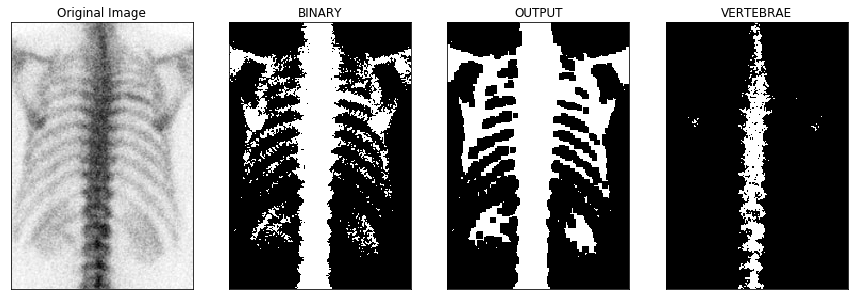

In [16]:
fig = plt.figure(figsize=(15,7))
titles = ['Original Image','BINARY','OUTPUT','VERTEBRAE']
images = [img, binary_img,output,vertebrae]
for i in range(len(titles)):
    plt.subplot(1,4,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

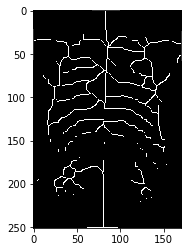

In [17]:
output_gray = cv2.cvtColor(output,cv2.COLOR_BGR2GRAY)
thinning_img = cv2.ximgproc.thinning(output_gray)
plt.imshow(thinning_img,'gray')
plt.show()

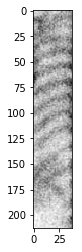

In [18]:
crop_img = cv2.imread('../data/sample_image/sample_rib3.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(crop_img,'gray')
plt.show()

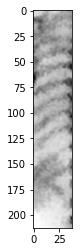

In [19]:
crop_img_denoise = cv2.fastNlMeansDenoising(crop_img,7,15,3)
plt.imshow(crop_img_denoise,'gray')
plt.show()

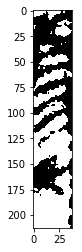

In [20]:
ret3,crop_img_threshold = cv2.threshold(crop_img_denoise,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(crop_img_threshold,'gray')
plt.show()

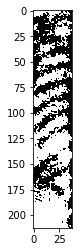

In [21]:
ret3,crop_img_threshold = cv2.threshold(crop_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(crop_img_threshold,'gray')
plt.show()